In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
from datetime import datetime
import random
import numpy as np
import pandas as pd
from optim import adam, sgd_momentum, rmsprop, sgd
from Trainer import Trainer
from agents import Agent
import os, glob, re

In [7]:
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [4]:
agents = []
len_ = 0
init_habit_strength = np.array([[0.0, 0.57],
                                [0.0, 0.57],
                                [0.0, 0.57],
                                [0.0, 0.57],
                                [0.0, 0.57],
                                [0.57, 0.0],  
                                [0.57, 0.0]])
    
csv_files = glob.glob(os.path.join('//global/scratch/users/norahluo/trajectory', '*.csv'))
demo = pd.read_csv('//global/scratch/users/norahluo/demo.csv')
    
for f in csv_files:
    df = pd.read_csv(f, parse_dates = ['date'], usecols = lambda x: 'Unnamed' not in x)
    df = df.loc[(df.date >= '2020-01-06')]
    df.reset_index(drop = True, inplace = True)
    demo_ = demo[demo.panelist_id == re.split(r'_|\.',f)[1]]        
    df['dfrw'] = demo_['dfrw_cap_mean'].values[0]           
    df['income'] = demo_['hh_income_mid'].values[0]
    print(demo_['hh_income_mid'].values[0], f)
    df['college'] = 1 if demo_['edu_level'].values[0] in ['University/College', 'Postgraduate Education'] else 0
    constraint = []
    agent = Agent(init_habit_strength, df, param_constraint = constraint)
    agents.append(agent)

20000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1709100.csv
37500 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1915938.csv
37500 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2150933.csv
125000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2144247.csv
125000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2232448.csv
90000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2176868.csv
65000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1908497.csv
37500 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1892799.csv
65000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1915776.csv
65000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1577593.csv
90000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-1648609.csv
65000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2199348.csv
37500 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2252762.csv
20000 //global/scratch/users/norahluo/trajectory/

In [41]:
f = '//global/scratch/users/norahluo/trajectory/traj_EMBUSA-2070102.csv'
df = pd.read_csv(f, parse_dates = ['date'], usecols = lambda x: 'Unnamed' not in x)
df = df.loc[(df.date >= '2020-01-06')]
df.reset_index(drop = True, inplace = True)
demo_ = demo[demo.panelist_id == re.split(r'_|\.',f)[1]]        
df['dfrw'] = demo_['dfrw_cap_mean'].values[0]           
df['income'] = demo_['hh_income_mid'].values[0]
print(demo_['hh_income_mid'].values[0], f)
df['college'] = 1 if demo_['edu_level'].values[0] in ['University/College', 'Postgraduate Education'] else 0

250000 //global/scratch/users/norahluo/trajectory/traj_EMBUSA-2070102.csv


In [74]:
init_params = dict(zip(['HDP', 'HGP', 'hs', 'B', 'wh', 'w0'], [np.log(1/0.13-1), 0.3, 3.5/10, np.array([0.9, -0.009*10, -0.046, -0.46, -0.017, 0.07, -0.58, -1.39]), 20.4/100, 2.8/10]))

In [81]:
# Individual chooses to WFH from week 1-8 then commute week 9 & 10
idx = 6
df.loc[[idx+7*i for i in range(8)],'commute_filled'] = 0
df.loc[idx+7*8, 'commute_filled'] = 1
df.loc[[idx+7*i for i in range(9, 17)], 'commute_filled'] = 0

In [82]:
# get the habit strength, overall habituation, system weight and alternative probability
agent = Agent(init_habit_strength, df, [])
agent.params = init_params
HS, h, w, p = agent.forward()

In [83]:
df[df.weekday == 2].head(5)

,date,weekday,commute,commute_filled,missing,cases_avg_s,cases_avg_s_1wkbf,cases_avg_s_2wkbf,cases_avg_c,cases_avg_c_1wkbf,...,is_holiday_extra,during,post-vax,pre-covid,pre-vax,shelter-in-place,commute_filled_diff_dist,dfrw,income,college
6,2020-03-04,2,0.0,0.0,0,0.29,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0.0,5076.75104,37500,0
13,2020-03-11,2,0.0,0.0,0,1.80,0.29,0.00,0.14,0.00,...,0,0,0,1,0,0,0.0,5076.75104,37500,0
20,2020-03-18,2,NaN,0.0,1,7.71,1.80,0.29,0.29,0.14,...,0,0,0,0,0,1,1.0,5076.75104,37500,0
27,2020-03-25,2,1.0,0.0,0,27.43,7.71,1.80,3.75,0.29,...,0,0,0,0,0,1,1.0,5076.75104,37500,0
34,2020-04-01,2,1.0,0.0,0,67.29,27.43,7.71,14.43,3.75,...,0,0,0,0,0,1,1.0,5076.75104,37500,0


In [84]:
U = np.array([[0]*len(df), np.dot(agent.X, np.array([-np.exp(agent.params['B'][i]) if i in agent.constraint else agent.params['B'][i] * 0.1 if i == 1 else agent.params['B'][i] for i in range(len(agent.params['B']))]))]).T

In [85]:
wed_traj = df['commute_filled'][idx::7].reset_index()
wed_traj['WFH'] = 1 - wed_traj.commute_filled
wed_traj = wed_traj.rename(columns = {'commute_filled': 'Commute'}).drop('index', axis = 1)
wed_traj = wed_traj[['WFH', 'Commute']]

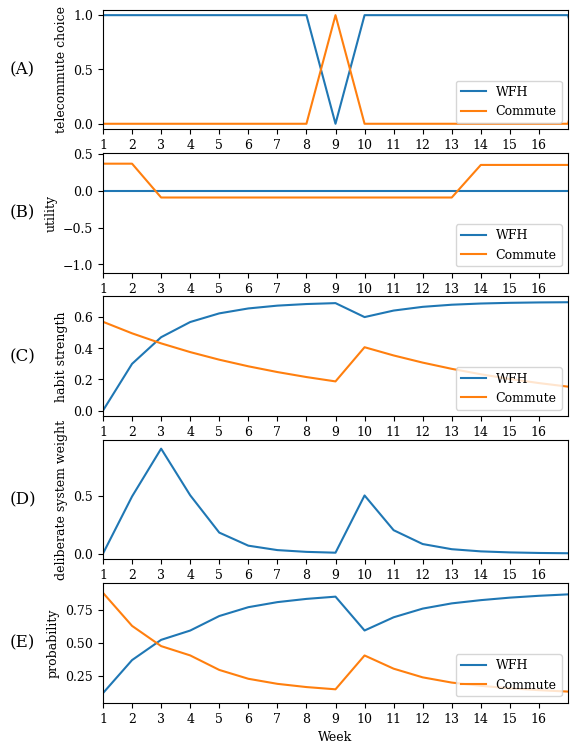

In [97]:
fig, axes = plt.subplots(5, 1, figsize = (6, 9))
wed_traj.plot(ax = axes[0])
axes[0].set_ylabel('telecommute choice')
axes[0].legend(loc = 'lower right')
pd.DataFrame(U[idx::7]).rename(columns = {0: 'WFH', 1: 'Commute'}).plot(ax = axes[1])
axes[1].set_ylabel('utility')
axes[1].legend(loc = 'lower right')
pd.DataFrame(HS[idx::7]).rename(columns = {0: 'WFH', 1: 'Commute'}).plot(ax = axes[2])
axes[2].set_ylabel('habit strength')
axes[2].legend(loc = 'lower right')
# axes[3].plot(pd.DataFrame(h[6::7]).rename(columns = {0: 'overall habituation'}))
# axes[3].set_ylabel('overall habituation')
axes[3].plot(pd.DataFrame(1-w[idx::7]).rename(columns = {0: 'Deliberate System Weight'}))
axes[3].set_ylabel('deliberate system weight')
pd.DataFrame(p[idx::7]).rename(columns = {0: 'WFH', 1: 'Commute'}).plot(ax = axes[4])
axes[4].set_ylabel('probability', fontsize = 9)
axes[4].legend(loc = 'lower right')
labels = ['(A)','(B)','(C)','(D)','(E)']
for i in range(5):
    axes[i].set_xlim([0, 16])
    axes[i].set_xticks([i for i in range(16)], [i+1 for i in range(16)])
    axes[i].text(-0.2, 0.5, labels[i], transform=axes[i].transAxes, fontsize=12, va='center')

axes[4].set_xlabel('Week')
plt.rc('font', size = 9)
plt.show()


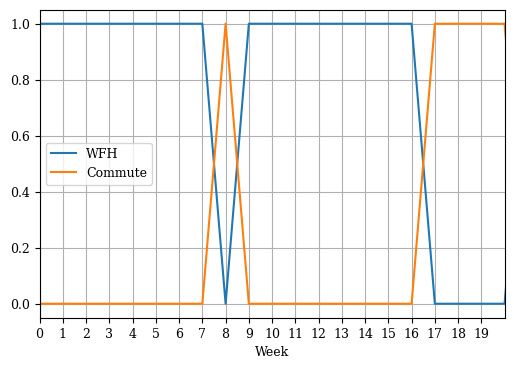

In [32]:
ax = wed_traj.plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)])
ax.set_xlabel('Week')
ax.set_ylabel('')
plt.grid()
plt.show()

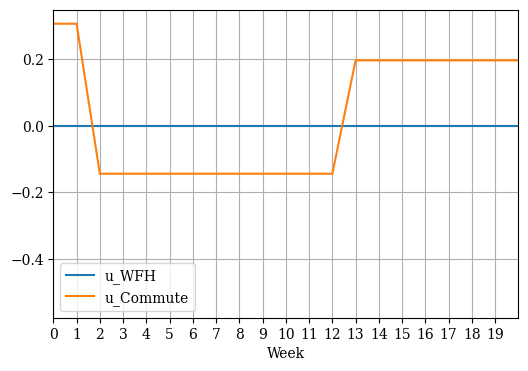

In [62]:
ax = pd.DataFrame(U[6::7]).rename(columns = {0: 'u_WFH', 1: 'u_Commute'}).plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)])
ax.set_xlabel('Week')
ax.set_ylabel('')
plt.grid()
plt.show()

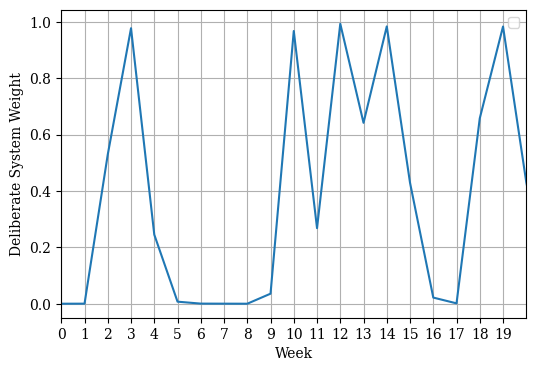

In [50]:
ax = pd.DataFrame(1-w[6::7]).rename(columns = {0: 'Deliberate System Weight'}).plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)])
ax.set_xlabel('Week')
ax.set_ylabel('Deliberate System Weight')
ax.legend('')
plt.grid()
plt.show()

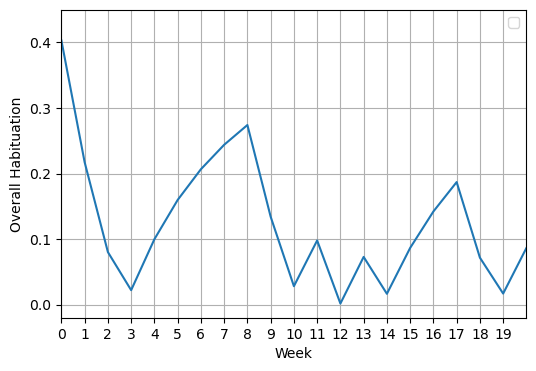

In [44]:
ax = pd.DataFrame(h[6::7]).rename(columns = {0: 'overall habituation'}).plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)])
ax.set_xlabel('Week')
ax.set_ylabel('Overall Habituation')
ax.legend('')
plt.grid()
plt.show()

<Figure size 400x700 with 0 Axes>

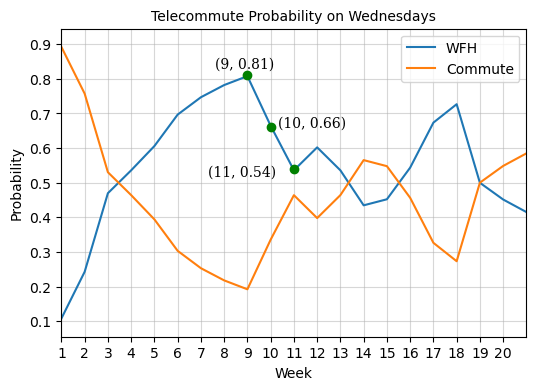

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4, 7))
ax = pd.DataFrame(p[6::7]).rename(columns = {0: 'WFH', 1: 'Commute'}).plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)], [i+1 for i in range(20)])
ax.set_ylabel('Probability')
ax.set_xlabel('Week')
ax.set_title('Telecommute Probability on Wednesdays', fontsize = 10)
# ax.axvline(x = 8, linestyle = '--', color = 'grey')

plt.grid(alpha = 0.5)
ax.annotate((9, 0.81), (6.6, 0.83))
ax.annotate((10, 0.66), (9.3, 0.66))
ax.annotate((11, 0.54), (6.3, 0.52))
ax.plot(8, 0.81, "og")
ax.plot(9, 0.66, "og")
ax.plot(10, 0.54, 'og')

<Figure size 400x700 with 0 Axes>

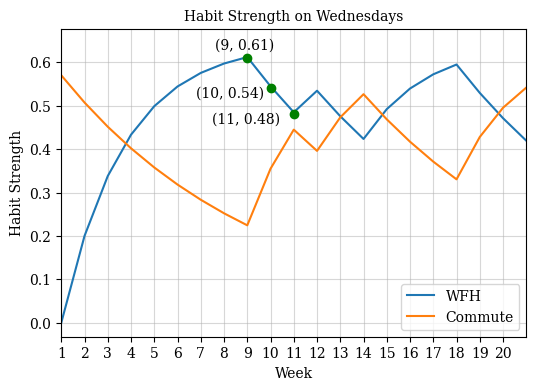

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4, 7))
ax = pd.DataFrame(HS[6::7]).rename(columns = {0: 'WFH', 1: 'Commute'}).plot(figsize = (6, 4))
ax.set_xlim([0, 20])
ax.set_xticks([i for i in range(20)], [i+1 for i in range(20)])
ax.set_ylabel('Habit Strength')
ax.set_xlabel('Week')
ax.set_title('Habit Strength on Wednesdays', fontsize = 10)
# ax.axvline(x = 8, linestyle = '--', color = 'grey')
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.grid(alpha = 0.5)
ax.annotate((9, 0.61), (6.6, 0.63))
ax.annotate((10, 0.54), (5.8, 0.52))
ax.annotate((11, 0.48), (6.5, 0.46))
ax.plot(8, 0.61, "og")
ax.plot(9, 0.54, "og")
ax.plot(10, 0.48, 'og')

In [43]:
pd.DataFrame(HS[6::7]).head(11)

,0,1
0,0.000000,0.570000
1,0.200000,0.507300
2,0.338000,0.451497
3,0.433220,0.401832
4,0.498922,0.357631
5,0.544256,0.318291
6,0.575537,0.283279
7,0.597120,0.252119
8,0.612013,0.224386
9,0.544692,0.354826


In [2]:
def habit_curve(HDP, HGP, wh, w0, A, init = 0):
    
    HS = [init]
    hs = []
    h = []
    ws = []
    idx_95 = 0
    idx_auto = 0
    flag_95 = True
    flag_auto = True
    bound = HGP/(HGP+HDP)
    
    for i in range(len(A)):
        val = HS[-1] - HS[-1] * HDP + (1 - HS[-1]) * HGP * A[i] 
        HS.append(val)
        hs.append([0, HS[-1]])
        h.append(np.sqrt(sum([(i - np.mean(hs))**2 for i in hs[-1]])))
        w = 1/(1+np.exp(-wh*h[-1]+w0))
        ws.append(w)
        if (val >= bound * 0.95) & flag_95:
            idx_95 = i+1
            flag_95 = False   
        if (w >= 0.99) & flag_auto:
            idx_auto = i+1
            flag_auto = False
        
    
    ax = pd.DataFrame(np.array(HS)).rename(columns = {0: 'Habit formation curve'}).plot(xlabel = 'Time step', ylabel = 'HS', figsize = (6, 4), label = 'Habit formation curve')
    
        


    ax.axhline(y=HS[idx_95], xmin = 0, xmax = (idx_95-ax.get_xlim()[0])/(ax.get_xlim()[1]-ax.get_xlim()[0]), color='gray', linestyle='--')
    ax.axvline(x=idx_95, ymin = 0, ymax = (HS[idx_95]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]), color='gray', linestyle='--')
    ax.annotate((idx_95, round(HS[idx_95], 2)), (idx_95 + 0.5, HS[idx_95] - 0.05))
    ax.plot(idx_95, HS[idx_95], "xg")

    ax.axvline(x=idx_auto, ymin = 0, ymax = (HS[idx_auto]-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0]), color='gray', linestyle='--')
    ax.axhline(y=HS[idx_auto], xmin = 0, xmax =(idx_auto-ax.get_xlim()[0])/(ax.get_xlim()[1]-ax.get_xlim()[0]), color='gray', linestyle='--')
    ax.annotate((idx_auto, round(HS[idx_auto], 2)), (idx_auto + 0.5, HS[idx_auto] - 0.05))
    ax.plot(idx_auto, HS[idx_auto], "xg")
    
        
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, round(bound,1)])    
    ax.axhline(y=bound, color='red', linestyle='--', label = 'Asymtotic maximum')
    print(ax.get_yticklabels()[7])
    ax.get_yticklabels()[7].set_color('red')
    
    ax.set_xticks([0, 5, 10, 15, 20, 25] + [idx_auto, idx_95])
    ax.set_ylabel('Habit Strength')
    ax.set_xlabel('Week')
    ax.legend()
    ax.grid()
    
    return np.array(HS), np.array(hs), np.array(ws), idx_auto, idx_95

Text(0, 0.8, '0.8')


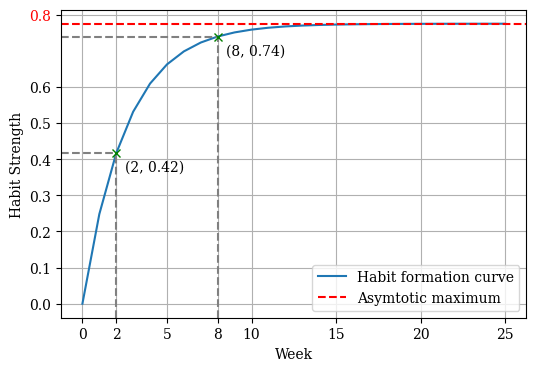

In [8]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# HDP = 0.097
# HGP = 0.3
# wh = 29.8
# w0 = 2.7
HDP = 0.072
HGP = 0.248
wh = 21.126
w0 = 0.332
A = np.array([1]*25)
array, hs, w, _, _ = habit_curve(HDP, HGP, wh, w0, A)

In [13]:
array

array([0.        , 0.4       , 0.61      , 0.72025   , 0.77813125,
       0.80851891, 0.82447243, 0.83284802, 0.83724521, 0.83955374,
       0.84076571, 0.841402  , 0.84173605, 0.84191143, 0.8420035 ,
       0.84205184, 0.84207721, 0.84209054, 0.84209753, 0.8421012 ,
       0.84210313, 0.84210414, 0.84210468, 0.84210495, 0.8421051 ,
       0.84210518])

In [14]:
hs

array([[0.        , 0.4       ],
       [0.        , 0.61      ],
       [0.        , 0.72025   ],
       [0.        , 0.77813125],
       [0.        , 0.80851891],
       [0.        , 0.82447243],
       [0.        , 0.83284802],
       [0.        , 0.83724521],
       [0.        , 0.83955374],
       [0.        , 0.84076571],
       [0.        , 0.841402  ],
       [0.        , 0.84173605],
       [0.        , 0.84191143],
       [0.        , 0.8420035 ],
       [0.        , 0.84205184],
       [0.        , 0.84207721],
       [0.        , 0.84209054],
       [0.        , 0.84209753],
       [0.        , 0.8421012 ],
       [0.        , 0.84210313],
       [0.        , 0.84210414],
       [0.        , 0.84210468],
       [0.        , 0.84210495],
       [0.        , 0.8421051 ],
       [0.        , 0.84210518]])

In [15]:
w

array([0.54062095, 0.57875839, 0.59852031, 0.608376  , 0.61321526,
       0.61554173, 0.61661911, 0.61708283, 0.6172511 , 0.61728213,
       0.6172536 , 0.61720289, 0.6171473 , 0.61709434, 0.61704678,
       0.61700522, 0.61696937, 0.61693856, 0.61691207, 0.61688923,
       0.61686946, 0.61685226, 0.61683722, 0.616824  , 0.61681233])

In [10]:
import numpy as np

In [9]:
1/(1+exp(-20.4 * h + 1.01)) = 0.997

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3138093230.py, line 1)

In [12]:
(np.log(1/0.997-1) - 1.01) / (-20.4)

0.3341244353575357

In [114]:
((hs - 0.5 * hs)**2 * 2 )**0.5 = 0.3625, 0.5 * hs * 2**0.5 = 0.4078,  

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3306184572.py, line 1)

In [13]:
hs = 0.334 * 2 / 2**0.5

In [14]:
hs

0.47234732983261374

In [19]:
1/(np.exp(1.01)+1)

0.26697985076114245